# Understanding chess Elo ratings
Elo ratings, developed by Arpad Elo, serve as a fundamental tool for evaluating the skill levels of players in competitive games, most notably chess. These ratings provide a standardized numerical representation of player proficiency, enabling comparisons across different players and tournaments. In the context of a histogram, frequency signifies the count of players falling within predefined Elo rating intervals. By examining the frequency distribution of Elo ratings, analysts can discern patterns in player skill levels and the prevalence of certain rating ranges within the dataset, facilitating deeper insights into the competitive landscape and player performance.


Elo Ratings DataFrame:
                 Elo Rating
Player                     
Edvardsen,R     1200.000000
Carlsen,Magnus   785.617327
Brameld,A       1476.330845
Fant,G           817.979448
Tallaksen,G     1181.073533


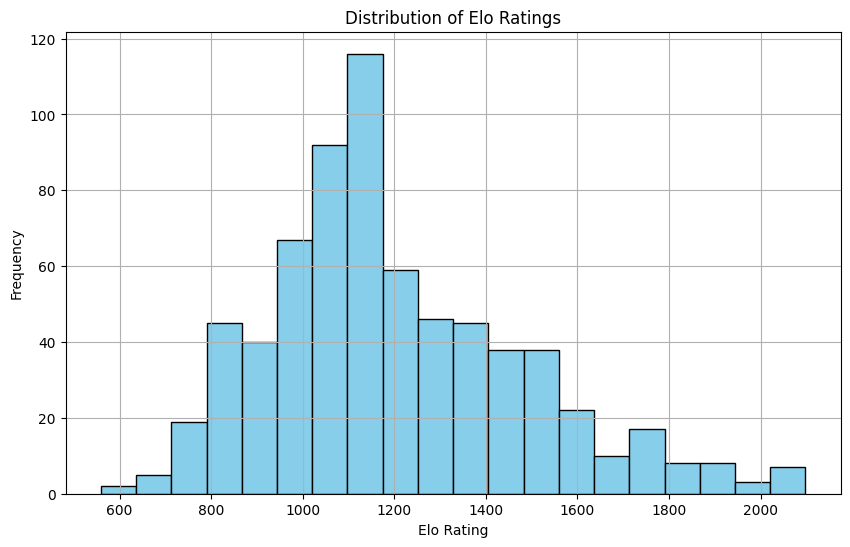

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

game_info_path = pd.read_csv("PR24MVDBACSAJR\\data\\Carlsen_game_info.csv")
moves_path = pd.read_csv("PR24MVDBACSAJR\\data\\Carlsen_moves.csv")
eco_nodes_path = pd.read_csv("PR24MVDBACSAJR\\data\\eco_codes.csv")

# load the data from the provided files
try:
    game_info_df = pd.read_csv(game_info_path)
    moves_df = pd.read_csv(moves_path)
    eco_nodes_df = pd.read_csv(eco_codes_path)
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# merge the dataframes on a common key, correcting column names based on your input
merged_df = pd.merge(game_info_df, moves_df, on="game_id", how="inner")
merged_df = pd.merge(merged_df, eco_nodes_df, left_on="eco", right_on="eco", how="left")

# implement Elo rating calculation
K = 32  # K-factor for updating Elo ratings
elo_ratings = {}  # Dictionary to store players' Elo ratings

# iterate through the merged dataframe and update Elo ratings based on game outcomes
for index, row in merged_df.iterrows():
    white_player = row["white"]
    black_player = row["black"]
    result = row["result"]

    # initialize Elo ratings if not already in the dictionary
    elo_ratings.setdefault(white_player, 1200)
    elo_ratings.setdefault(black_player, 1200)

    # calculate expected scores based on Elo ratings
    white_expected = 1 / (1 + 10 ** ((elo_ratings[black_player] - elo_ratings[white_player]) / 400))
    black_expected = 1 - white_expected

    #pdate Elo ratings based on game result
    if result == "1-0":  # white wins
        elo_ratings[white_player] += K * (1 - white_expected)
        elo_ratings[black_player] += K * (0 - black_expected)
    elif result == "0-1":  # black wins
        elo_ratings[white_player] += K * (0 - white_expected)
        elo_ratings[black_player] += K * (1 - black_expected)
    elif result == "1/2-1/2":  # draw
        elo_ratings[white_player] += K * (0.5 - white_expected)
        elo_ratings[black_player] += K * (0.5 - black_expected)

# convert elo_ratings dictionary to DataFrame for analysis and visualization
elo_df = pd.DataFrame.from_dict(elo_ratings, orient="index", columns=["Elo Rating"])
elo_df.index.name = "Player"

# display the Elo ratings DataFrame
print("\nElo Ratings DataFrame:")
print(elo_df.head())

# visualize Elo ratings distribution
plt.figure(figsize=(10, 6))
plt.hist(elo_df["Elo Rating"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Elo Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Elo Ratings")
plt.grid(True)
plt.show()


The frequency on the y-axis represents the number of players or occurrences within each Elo rating bin. Each bin represents a range of Elo ratings, and the frequency indicates how many players fall within that range. For example, if the frequency value for an Elo rating bin of 1400-1420 is 5, it means that there are 5 players whose Elo ratings fall within that range. This histogram provides a visual representation of the distribution of Elo ratings among the players analyzed, allowing you to observe the concentration or spread of player skill levels within the dataset.